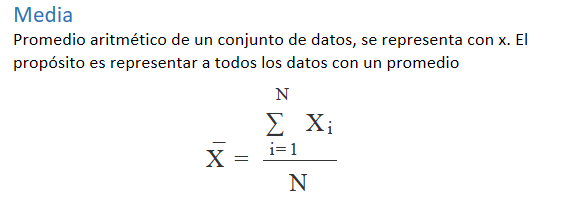

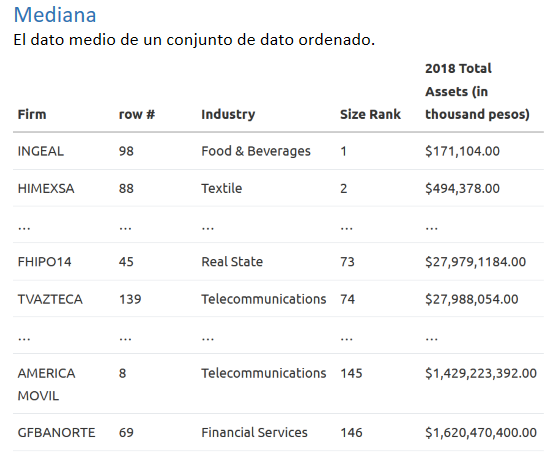

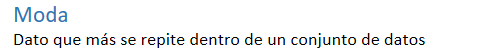

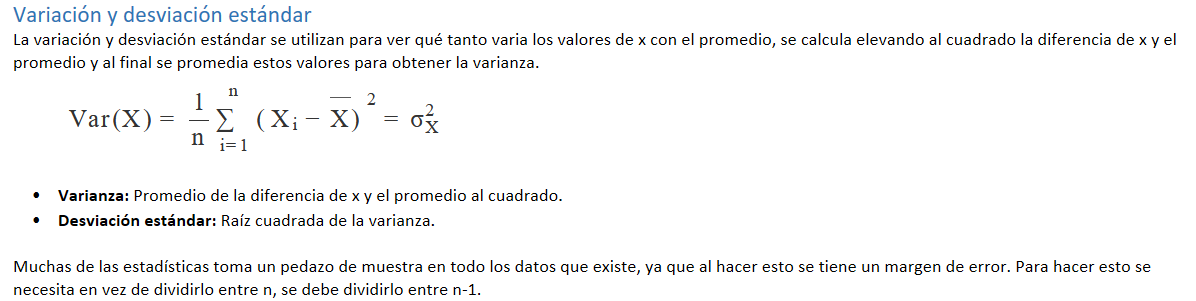

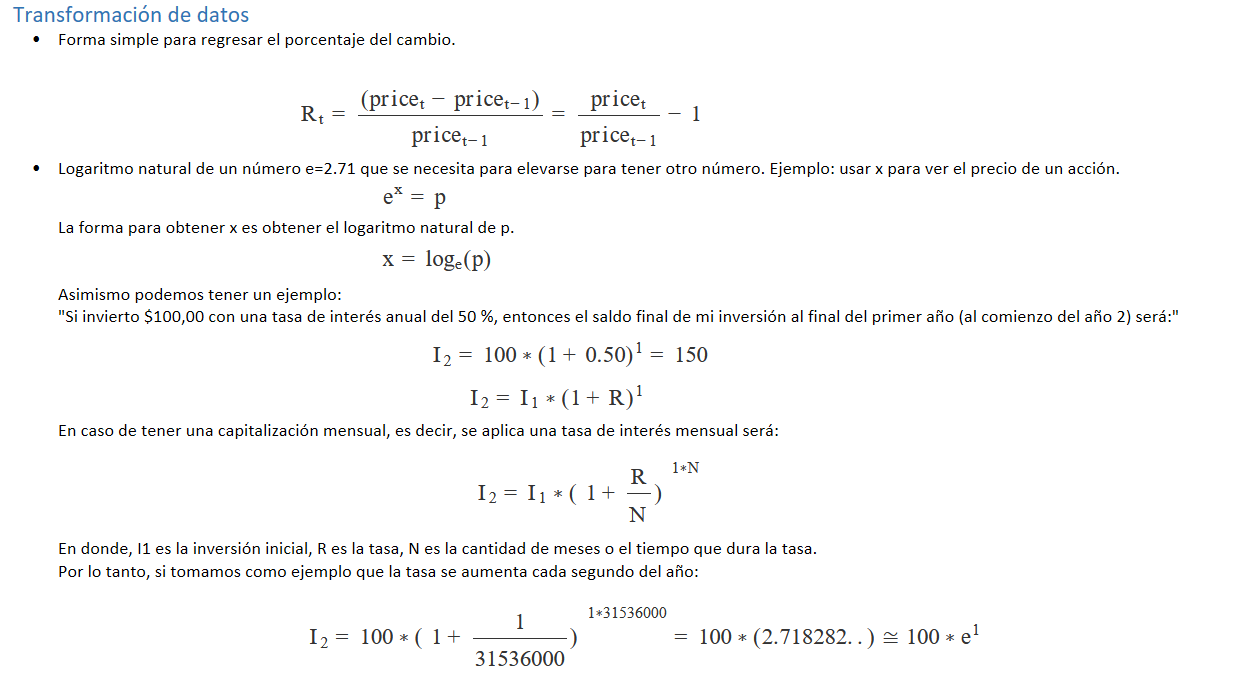

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

BTC = pdr.get_data_yahoo('BTC-USD', start="01/01/2017", interval="d")
BTC #Mostrar todos los detalles sobre la currencia de los Bitcoins

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359


In [4]:
BTC.tail() #Mostrar la currencia de los últimos días

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24809.279297,23956.478516,23984.750000,24366.597656,38189768704,24366.597656


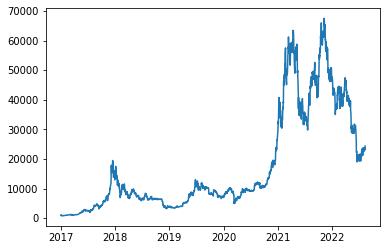

In [5]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()
#Mostrar la currencia desde una grafica para visualizar fácilmente

In [6]:
BTC.info() #Mostrar el record de altas, bajas, etc...

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049 entries, 2017-01-01 to 2022-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2049 non-null   float64
 1   Low        2049 non-null   float64
 2   Open       2049 non-null   float64
 3   Close      2049 non-null   float64
 4   Volume     2049 non-null   int64  
 5   Adj Close  2049 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.1 KB


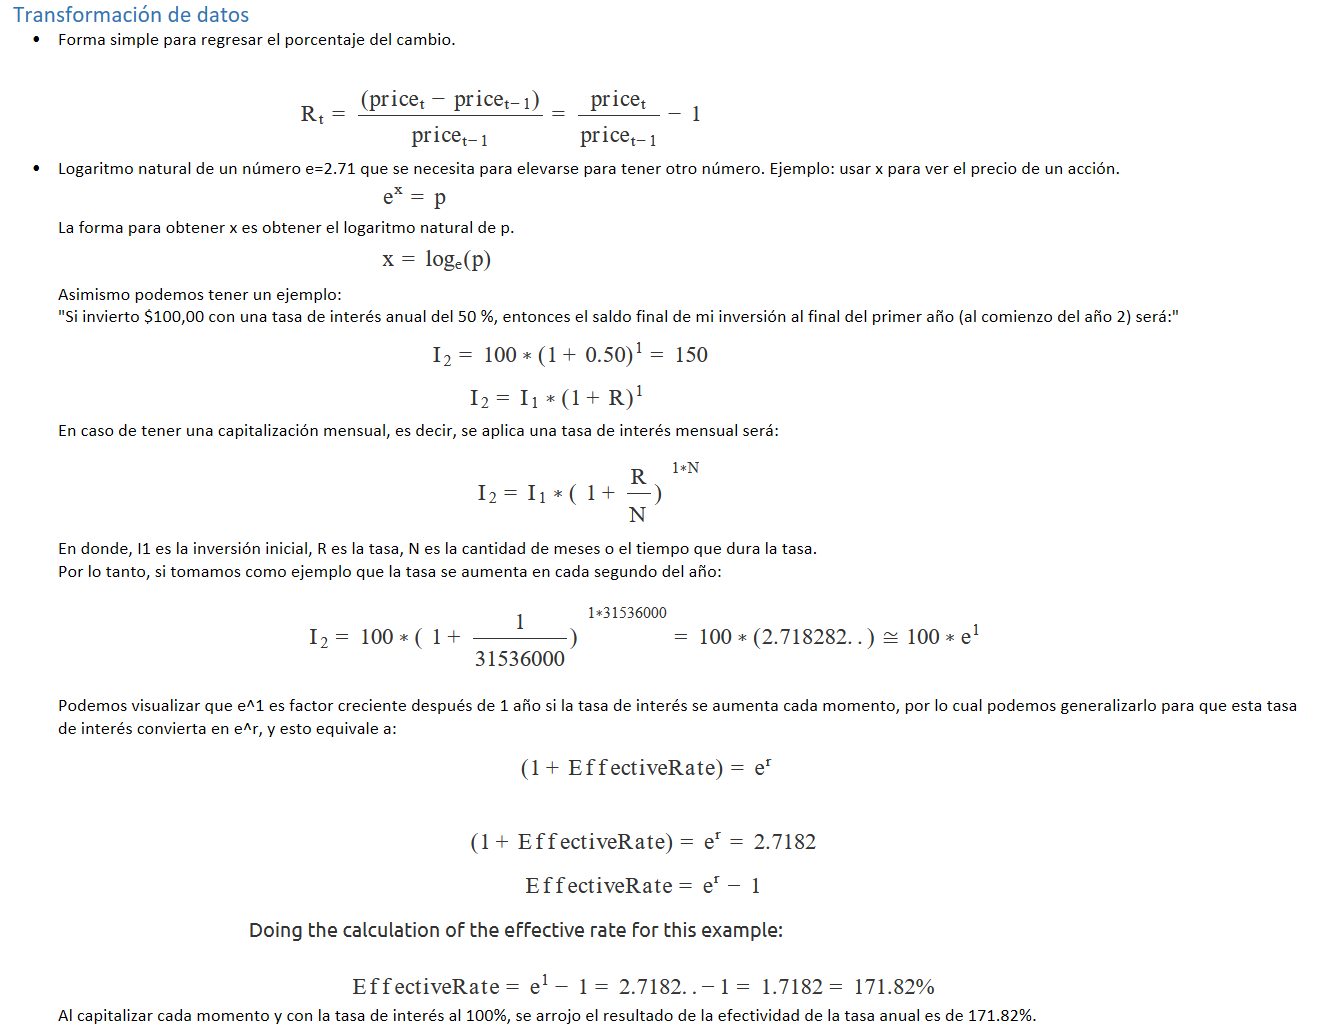

In [7]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])
#R representa el returno simple

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-07    0.009347
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.017495
Name: R, Length: 2049, dtype: float64


In [8]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()
#r representa al retorno continuo

In [9]:
BTC= BTC.dropna()

In [10]:
sumretR = BTC["R"].describe()
#sumretr = BTC["r"].describe()
sumretR
#Usando el retorno simple podemos dar cuenta la descripción de la currencia en cada aspecto, en donde la más alta a lo largo de la historia fue de 25.25% y el peor fue -37.17%

count    2048.000000
mean        0.002424
std         0.041370
min        -0.371695
25%        -0.015888
50%         0.002220
75%         0.020927
max         0.252472
Name: R, dtype: float64

In [11]:
BTC[BTC["R"]<-0.15]
#Mostrar los días que tenga retornos con menos de 15%
#Siendo así, se podrá interpretar las causas que provocaron la caida de los Bitcoins

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


In [12]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)
#Mostrar los días que aumento más de 15%

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


In [13]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())
#Mostrar el resumen con las funciones de promedio, varianza, desviación estándar y la medianan

The daily average return of Bitcoin is  0.0015600047060899424
The daily variance of Bitcoin is  0.0017373706129131478
The daily standard deviation (volatility) of Bitcoin return is  0.04168177794808119
The daily median return of Bitcoin is  0.0022173493980961467


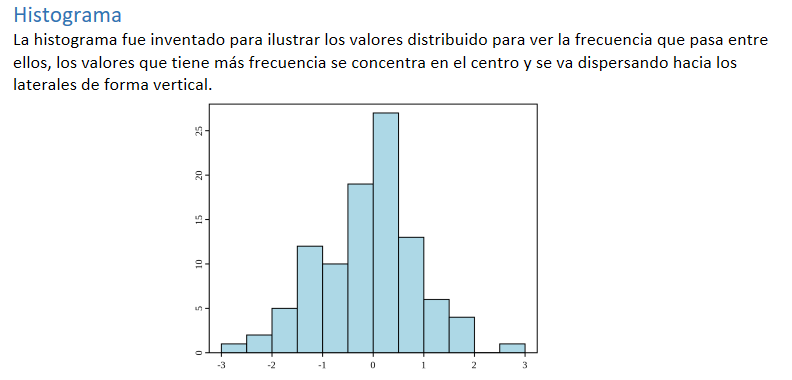

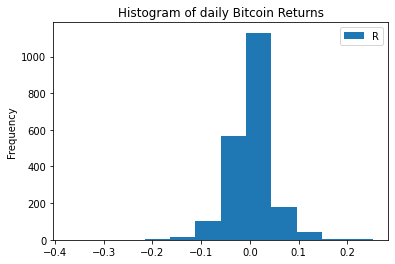

In [14]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=1,title="Histogram of daily Bitcoin Returns")
#Mostrar el histograma con el retorns simple

Así como se muestra en la histograma anterior, el BTC tiene una frecuencia máxima en el que se quedó estable y después tiene una frecuencia aproximadamente 600 que se devalua en un 0.1.

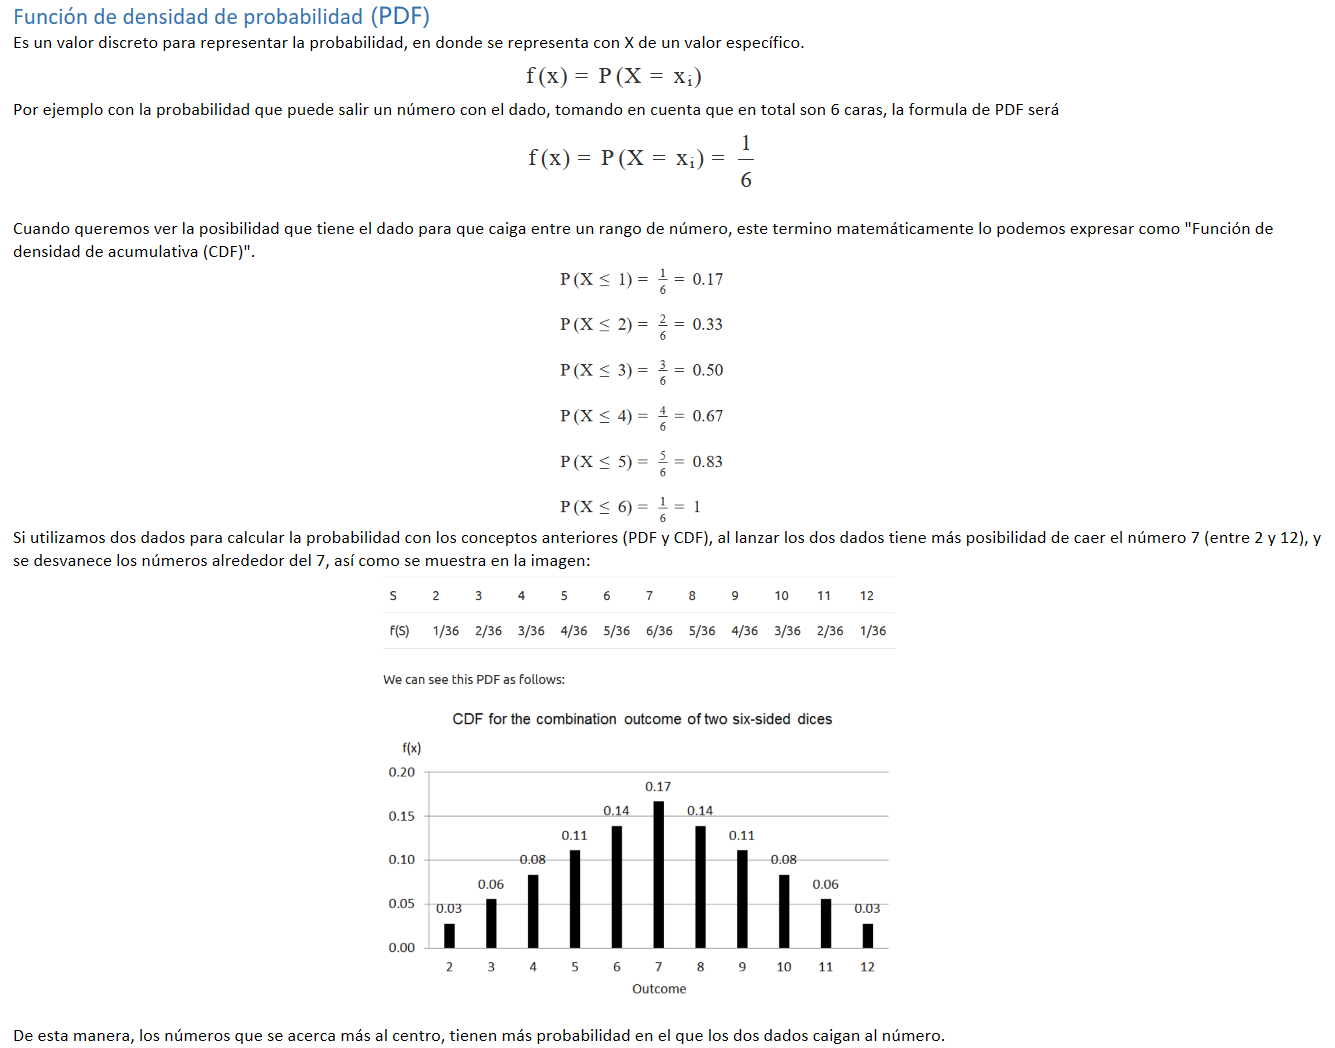

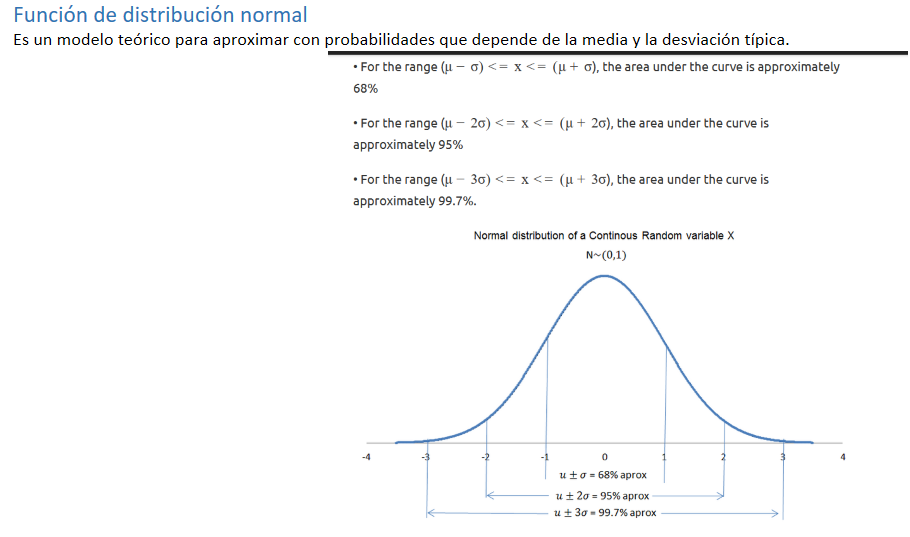

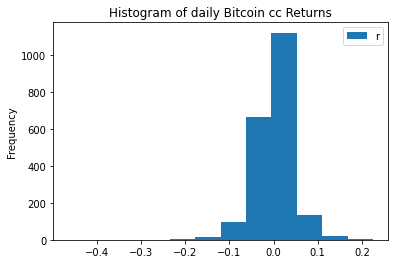

In [15]:
r_bitcoin = pd.DataFrame(BTC[["r"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=1,title="Histogram of daily Bitcoin cc Returns")
#Mostrar el histograma con el retorns continuo